In [ ]:
# ## logistic regression in numpy, using arrays that will make extending it to a FFNN easier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# image input is 512*512*3. Unravel these to 1darray of length L
# then put in array of training data, of dimensions L by m (where m is size of training group)
# (a column for each datum)
# and Y is 1*y matrix of labels

# uses lower case m for training group


In [ ]:

### logistic regression:
# y = sigmoid(W^T*x + b)    # sigmoid of linear weights


# assume all numpy functions are vectorised

In [150]:
# load data
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
data = data.to_numpy()


# unique, counts = np.unique(data[:, 4], return_counts=True)
setosa_idx = data[:, 4] == 'setosa'  # simplify species column to binary
data[:, 4] = 1   # not setosa
data[setosa_idx, 4] = 0   # setosa


# data = np.hstack([np.array([1]*150).reshape(150,1), data])  # adding intercept column


idx = np.random.rand(*data.shape).argsort(axis=0) # randomising order for test/train split
data = np.take_along_axis(data,idx,axis=0)


print(*data.shape)  # return values outside tuple
print(data.shape)



150 5
(150, 5)


In [189]:
train_input = data[:120, :4].T   # transpose to row for each feature and column for each value: faster calcs
train_labs = data[:120, 4:].T

test_input = data[120:, :4].T
test_labs = data[120:, 4:].T

train_input.astype(np.float)
test_input.astype(np.float)


train_input.shape

(4, 120)

In [191]:
print(train_input.dtype)

object


In [268]:
def cost_function(y, y_hat):   
    """Logistic regression cost function
    y = actual
    y_hat = predicted
    
    If y=1 the 2nd part goes to zero. It rewards a large y_hat (ie, close to 1)
    If y=0 it rewards a small y_hat value (ie, close to 0, as you'd expect)
    
    More on cost function here: 
    https://www.coursera.org/learn/neural-networks-deep-learning/lecture/yWaRd/logistic-regression-cost-function
    """
    m = y.shape[1]  # total predictions made
    print('m of: ' + str(m))
    
    lhs_with_dot = np.dot(y, np.log(y_hat).T) # returns 1x1 array
    rhs_with_dot = np.dot((1 - y), np.log(1 - y_hat).T)
    
    lhs = np.multiply(test_labs, np.log(dummy_prediction)) # element-wise returns 1 * m array
    rhs = np.multiply((1 - y), np.log(1 - y_hat))
    
    """
    print(rhs_with_dot.shape)    
    print(rhs.shape)    
    print(np.sum(rhs_with_dot))
    print(np.sum(rhs))
    """

    total_loss = np.sum(lhs + rhs)
    return -total_loss / m



In [269]:
def gradient_descent(input_data, y, lr, iterations):
    """Gradient descent to minimise cost function
    
    No complicated use of chain rule yet as no NN
    lr = Learning rate; magnitude of updates on each iteration
    
    
    dz = (y_hat - y) / m  # differential of z (linear regression stage)
                        m = sample size
                        
    dw1 = x1 * dz  # x1 = 
    dw2 = x2 * dz
    .. etc
    db = b * dz
    
    For more on where the above formulae come from:
    https://www.coursera.org/learn/neural-networks-deep-learning/lecture/5sdh6/logistic-regression-gradient-descent
    
    
    w = w - lr*dw, where dw = slope of parameters (ie, derivative of cost func with respect to w)
    b = b - lr*db    # same idea, for intercept value
    
    
   """
    w_input_params_len = input_data.shape[0]
    w = np.random.uniform(size=(w_input_params_len, 1)) # make of size m by 1
    b = np.random.uniform(size=(1, 1))
    
    assert(w.shape == (w_input_params_len, 1))  # raises error if not true
    
    print(input_data.shape)
    print(w.T.shape)
    
    
    # starting gradient descent loop
    for i in range(iterations):
        
        # compute linear transformation of inputs
        linear_result = np.dot(w.T, input_data) + b  # returns m * 1 array
        linear_result = linear_result.astype(np.float)  # ensure is float; needed for np.exp() to work
        #print('linear_result shape: ' + str(linear_result.shape))

        """
        print(linear_result.shape)
        print(linear_result.ndim)
        print(linear_result.dtype)
        """

        y_hat = 1 / (1 + np.exp(-linear_result * 1.0))  # apply logistic func for each input value
        #print('y_hat shape: ' + str(y_hat.shape))

        # get weight derivatives
        dz = y_hat - y           # think 'z' refers to the linear_result stage
                                # dz has a value for each input datum

        db = np.sum(dz) / m


        dw = np.dot(1/m, dz.T)  # should dw be 4,1 not 120,1 dimensions, or a single value
        #print(dw.shape)
        dw = np.mean(dw)   # fudging it until understand further: making it a single number for now
                        # which means all weights will update by an equal amount in the gradient descent
                        # which doesnt seem optimal


        # make new weights
        w = w - lr * dw
        b = b - lr * db
        
    return w, b

    
    

In [270]:
## getting weights
w, b = gradient_descent(train_input, train_labs, 0.1, 10000)
print(w)
print(b)


(4, 120)
(1, 4)
[[0.06706159]
 [0.24803914]
 [0.43868117]
 [0.4569271 ]]
[[-2.441317]]


In [271]:
# applying to test set
linear_result = np.dot(w.T, test_input) + b
linear_result = linear_result.astype(np.float)
predictions = 1 / (1 + np.exp(-linear_result))

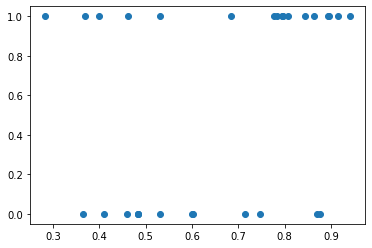

In [272]:
# evaluating accuracy on test set: doesnt seem to differentiate between classes too well
plt.scatter(predictions, test_labs)

In [273]:
# recommends always making arrays 2d to avoid confusion

In [275]:
# test cost function
dummy_prediction = np.random.uniform(size=30)
dummy_prediction = dummy_prediction.reshape(1, dummy_prediction.shape[0])

cost = cost_function(test_labs, dummy_prediction)
cost


m of: 30


1.0522477564544752